In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
import sys
sys.path.append("/Users/Max/Documents/Studium/HiWi/HiWi_Fernerkundung/FlightPhases/")

import FlightPhaseTools as fpt
from ResearchFlight import ResearchFlight
from ResearchFlightSegment import ResearchFlightSegment

# Load data into xarray datasets using typhon FileSet objects.

In [2]:
bahamas = xr.open_dataset('/Users/Max/Documents/Studium/HiWi/HiWi_Fernerkundung/FlightPhases/data/bahamas_20200202_v0.4.nc')
dropsondes = xr.open_dataset('/Users/Max/Documents/Studium/HiWi/HiWi_Fernerkundung/FlightPhases/data/dropsondes_20200202_v0.4.nc')

# Determine the timestamps of the different flight phases using the FlightPhaseTools module.

In [3]:
takeoff = 0
touchdown = len(bahamas['time']) - 1

#1st circle set
###############
enter_c1 = fpt.ds_timestamp_ind(bahamas, dropsondes,  0)
exit_c1  = fpt.ds_timestamp_ind(bahamas, dropsondes, 11)
enter_c2 = fpt.ds_timestamp_ind(bahamas, dropsondes, 12)
exit_c2  = fpt.ds_timestamp_ind(bahamas, dropsondes, 23)
enter_c3 = fpt.ds_timestamp_ind(bahamas, dropsondes, 24)
exit_c3  = fpt.ds_timestamp_ind(bahamas, dropsondes, 36)


#Clover pattern
###############
max_roll_before_clover1 = fpt.max_timestamp_ind(bahamas, 'roll', 
                          slice('2020-02-02T14:55:00', '2020-02-02T15:05:00'), order=1000)

enter_clover1 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_before_clover1, 2., 0.1)

max_roll_after_clover1 = fpt.max_timestamp_ind(bahamas, 'roll', 
                         slice('2020-02-02T15:20:00', '2020-02-02T15:40:00'), order=1000)

exit_clover1 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_clover1, 2., 0.1)


enter_clover2 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_after_clover1, 2., 0.1)

max_roll_after_clover2 = fpt.max_timestamp_ind(bahamas, 'roll', 
                         slice('2020-02-02T15:45:00', '2020-02-02T16:00:00'), order=1000)

exit_clover2 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_clover2, 2., 0.1)

enter_clover3 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_after_clover2, 2., 0.1)

max_roll_after_clover3 = fpt.max_timestamp_ind(bahamas, 'roll', 
                         slice('2020-02-02T16:10:00', '2020-02-02T16:25:00'), order=1000)

exit_clover3 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_clover3, 2., 0.2)

#2nd circle set
###############
enter_c4 = fpt.ds_timestamp_ind(bahamas, dropsondes, 52)
exit_c4  = fpt.ds_timestamp_ind(bahamas, dropsondes, 63)
enter_c5 = fpt.ds_timestamp_ind(bahamas, dropsondes, 64)
exit_c5  = fpt.ds_timestamp_ind(bahamas, dropsondes, 75)
enter_c6 = fpt.ds_timestamp_ind(bahamas, dropsondes, 76)
exit_c6  = fpt.ds_timestamp_ind(bahamas, dropsondes, 88)

enter_radar_cal_tilted = fpt.find_first_value_after_ts_ind(bahamas, 'roll', exit_c6, 11., 0.5)

min_roll_after_radar_cal_tilted = fpt.min_timestamp_ind(bahamas, 'roll', 
                                  slice('2020-02-02T19:40:00', '2020-02-02T19:50:00'), order=1000)

exit_radar_cal_tilted = fpt.find_first_value_before_ts_ind(bahamas, 'roll', min_roll_after_radar_cal_tilted, 10., 0.5)

enter_radar_wiggle = exit_radar_cal_tilted

max_roll_before_lidar_cal = fpt.max_timestamp_ind(bahamas, 'roll', 
                            slice('2020-02-02T19:40:00', '2020-02-02T19:50:00'), order=1000)

exit_radar_wiggle = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_before_lidar_cal, 0., 0.03)

enter_lidar_cal = exit_radar_wiggle

bahamas["altitude_dt"] = (['time'], np.append(np.diff(bahamas["altitude"]),0))

min_dzdt_after_lidar_cal = fpt.min_timestamp_ind(bahamas, 'altitude_dt', 
                           slice('2020-02-02T19:50:00', '2020-02-02T20:00:00'), order=1000) 

exit_lidar_cal = fpt.find_first_value_before_ts_ind(bahamas, 'altitude_dt', min_dzdt_after_lidar_cal, 0., 0.05)

ts_ind_list = [takeoff, enter_c1, exit_c1, enter_c2, 
               exit_c2, enter_c3, exit_c3, enter_clover1, 
               exit_clover1, enter_clover2, exit_clover2,
               enter_clover3, exit_clover3, enter_c4, 
               exit_c4, enter_c5, exit_c5, enter_c6, 
               exit_c6, enter_radar_cal_tilted, exit_radar_cal_tilted, 
               exit_radar_wiggle, exit_lidar_cal, touchdown,]
label_list = ["takeoff", "enter_c1", "exit_c1", 
              "enter_c2", "exit_c2", "enter_c3", 
              "exit_c3", "enter_clover1", "exit_clover1", 
              "enter_clover2", "exit_clover2", "enter_clover3",
              "exit_clover3", "enter_c4", "exit_c4", 
              "enter_c5", "exit_c5", "enter_c6", 
              "exit_c6", "enter_radar_cal_tilted", 
              "exit_radar_cal_tilted/enter_radar_wiggle", 
              "exit_radar_wiggle/enter_lidar_cal", "exit_lidar_cal", 
              "touchdown"]

In [4]:
#create markers for every dropsonde
#only for checking segments

takeoff = 0
touchdown = len(bahamas['time']) - 1

ts_ind_list = []
label_list = np.arange(len(dropsondes["launch_time"])+1)
for i in range(len(dropsondes["launch_time"])):
    ts_ind_list.append(fpt.ds_timestamp_ind(bahamas, dropsondes,  i))

# Create basic timeseries of bahamas data with markers for determined timestamps to manually evaluate the validity of the timestamps.

/Users/Max/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


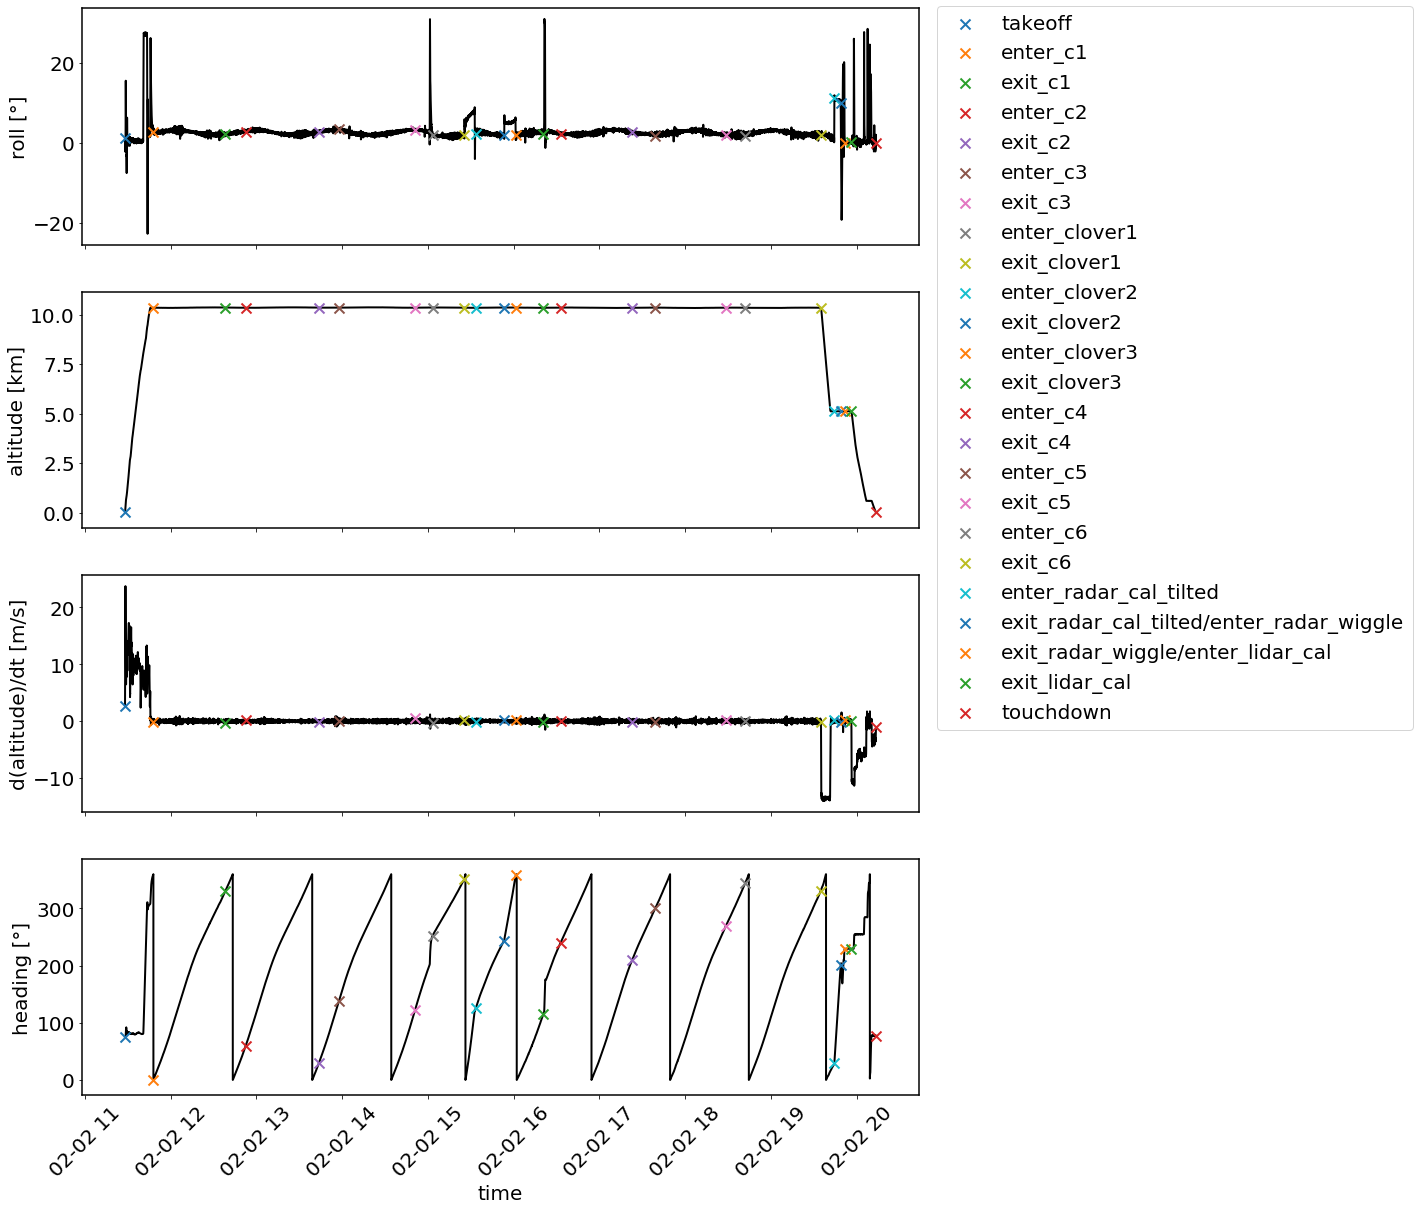

In [4]:
fig, ax = fpt.plot_bahamas_timeseries(bahamas, ts_ind_list, label_list)

# Create a ResearchFlight object to represent the flight meta data.

In [5]:
RF08 = ResearchFlight(name=f"RF{bahamas.attrs['flight_number']}",
                      mission=bahamas.attrs['mission'],
                      flight_id='HALO-0202',
                      contacts=[
                          {
                              'name': 'Marc Prange', 
                              'email': 'marc.prange@uni-hamburg.de',
                              'tags': ['dataset creator'],
                          },
                          {
                              'name': 'Felix Ament',
                              'email': 'felix.ament@uni-hamburg.de',
                              'tags': ['flight PI']
                          }
                      ],
                      date=fpt.dt64_to_dt(bahamas['time'][takeoff].values).date(),
                      flight_report='https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200202/HALO_0202.pdf',
                      takeoff=fpt.dt64_to_dt(bahamas['time'][takeoff].values),
                      landing=fpt.dt64_to_dt(bahamas['time'][touchdown].values),
                      events=[],
                      remarks=['Flying seven standard circle patterns (six circles with dropsondes).',
                               'Flying the novel clover pattern as excursion. '
                               'Convection and clouds were organized as flowers moving mostly eastwards '
                               'with a slight component to the North.',
                               'Essentially, we tracked three to four flowers.'],
                     )

# Store the flight phase information in ResearchFlightSegment objects.

In [6]:
circle1 = ResearchFlightSegment(kind='circle',
                                name='c1',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c1].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c1].values)
                               )
circleBreak1to2 = ResearchFlightSegment(kind='circle_break',
                                        name='cb1to2',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c1].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c2].values)
                                       )
circle2 = ResearchFlightSegment(kind='circle',
                                name='c2',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c2].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c2].values)
                               )
circleBreak2to3 = ResearchFlightSegment(kind='circle_break',
                                        name='cb2to3',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c2].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c3].values)
                                       ) 
circle3 = ResearchFlightSegment(kind='circle',
                                name='c3',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c3].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c3].values)
                               )
clover1 = ResearchFlightSegment(kind='clover_leg',
                                name='clover1',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_clover1].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_clover1].values)
                               )
cloverTurn1to2 = ResearchFlightSegment(kind='clover_turn',
                                       name='clvturn1to2',
                                       start=fpt.dt64_to_dt(bahamas["time"][exit_clover1].values),
                                       end=fpt.dt64_to_dt(bahamas['time'][enter_clover2].values)
                                      )
clover2 = ResearchFlightSegment(kind='clover_leg',
                                name='clover2',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_clover2].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_clover2].values)
                               )
cloverTurn2to3 = ResearchFlightSegment(kind='clover_turn',
                                       name='clvturn2to3',
                                       start=fpt.dt64_to_dt(bahamas["time"][exit_clover2].values),
                                       end=fpt.dt64_to_dt(bahamas['time'][enter_clover3].values)
                                      )
clover3 = ResearchFlightSegment(kind='clover_leg',
                                name='clover3',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_clover3].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_clover3].values)
                               )
circle4 = ResearchFlightSegment(kind='circle',
                                name='c4',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c4].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c4].values)
                               )
                                     
circleBreak4to5 = ResearchFlightSegment(kind='circle_break',
                                        name='cb4to5',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c4].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c5].values)
                                       )
circle5 = ResearchFlightSegment(kind='circle',
                                name='c5',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c5].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c5].values)
                               )
circleBreak5to6 = ResearchFlightSegment(kind='circle_break',
                                     name='cb5to6',
                                     start=fpt.dt64_to_dt(bahamas["time"][exit_c5].values),
                                     end=fpt.dt64_to_dt(bahamas['time'][enter_c6].values)
                                    )                                    
circle6 = ResearchFlightSegment(kind='circle',
                                name='c6',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c6].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c6].values)
                               )
radar_cal_tilted = ResearchFlightSegment(kind='radar_calibration_tilted', 
                                         name='radar_cal_tilted',
                                         start=fpt.dt64_to_dt(bahamas["time"][enter_radar_cal_tilted].values),
                                         end=fpt.dt64_to_dt(bahamas['time'][exit_radar_cal_tilted].values)
                                        )
radar_cal_wiggle = ResearchFlightSegment(kind='radar_calibration_wiggle', 
                                         name='radar_cal_wiggle',
                                         start=fpt.dt64_to_dt(bahamas["time"][enter_radar_wiggle].values),
                                         end=fpt.dt64_to_dt(bahamas['time'][exit_radar_wiggle].values)
                                        )
lidar_cal = ResearchFlightSegment(kind='lidar_calibration',
                                  name='lidar_cal',
                                  start=fpt.dt64_to_dt(bahamas["time"][enter_lidar_cal].values),
                                  end=fpt.dt64_to_dt(bahamas['time'][exit_lidar_cal].values)
                                 ) 

# Append the flight segments to the ResearchFlight object and save the object content to a .yaml file.

In [7]:
RF08.to_dictionary()

{'name': 'RF08',
 'mission': 'EUREC4A',
 'flight_id': 'HALO-0202',
 'contacts': [{'name': 'Marc Prange',
   'email': 'marc.prange@uni-hamburg.de',
   'tags': ['dataset creator']},
  {'name': 'Felix Ament',
   'email': 'felix.ament@uni-hamburg.de',
   'tags': ['flight PI']}],
 'date': datetime.date(2020, 2, 2),
 'flight_report': 'https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200202/HALO_0202.pdf',
 'takeoff': datetime.datetime(2020, 2, 2, 11, 28, 2),
 'landing': datetime.datetime(2020, 2, 2, 20, 13, 24),
 'events': [],
 'remarks': ['Flying seven standard circle patterns (six circles with dropsondes).',
  'Flying the novel clover pattern as excursion. Convection and clouds were organized as flowers moving mostly eastwards with a slight component to the North.',
  'Essentially, we tracked three to four flowers.'],
 'segments': []}

In [8]:
RF08.append_segments([circle1, circleBreak1to2, 
                      circle2, circleBreak2to3,
                      circle3, 
                      clover1, cloverTurn1to2,
                      clover2, cloverTurn2to3,
                      clover3,
                      circle4, circleBreak4to5,
                      circle5, circleBreak5to6, 
                      circle6, 
                      radar_cal_tilted, radar_cal_wiggle, lidar_cal])

In [9]:
RF08.to_yaml(filename='/Users/Max/Documents/Studium/HiWi/HiWi_Fernerkundung/FlightPhases/halo-flight-phase-separation-1/flight_phase_files/HALO_RF08_20200202_info.yaml')